# MONET2030 - Analysis

In [1]:
# Stdlib imports
import re
from pathlib import Path
from collections import namedtuple

# 3rd party imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import colormaps as cm

# Local imports
from pymonet import monet_scraper as scraper
from pymonet import monet_processor as processor
from pymonet import monet_consts as const
from pymonet import monet_analysis as analysis
from pymonet import monet_aux as aux

## 1) Get Web Data

In [2]:
scraper_pipeline = scraper.MonetLoader()
raw_data = await scraper_pipeline.load()

Getting key indicators table...
Reading from disk...
-> done!
Getting indicator information...
Reading from disk...
-> done!
Getting observable information...
Reading from disk...
-> done!
Getting data files..
paths_exist: True
dirs_not_empty: True
Reading raw data from disk...
-> done!


## 2) Process/Transform Data

In [3]:
pipeline = processor.TransformationPipeline(raw_data,
                                            scraper_pipeline.indicators_metatable,
                                            scraper_pipeline.observables_metatable
                                           )
final_output = pipeline.run()

> Stage 1:
-> done!
> Stage 2:
-> done!
> Stage 3:
-> done!
> Stage 4:
-> done!
> Stage 5:
-> done!
> Stage 6:
-> done!
> Stage 7:
-> done!


In [4]:
results = pipeline.collect_results()

There results can be accessed via the following keys:
. raw
. clean
. interpolated
. residuals
. zscores
. metrics_metatable
. confidence_intervals
. irrelevant_metrics
. duplicated_rows
. constant_cols
. sparse_cols
. outside_years
. uncertainty_envelopes
. trends
. p_values
. optimal_stl


## 3) Visual inspection

In [5]:
#figsaxes = pipeline.create_inspection_plots(create='all', write=True)

## 4) Analysis

### 4.1) Data Availability & Coverage Analysis

#### 4.1.1) Analysis of capitals

Question: How many metrics per capital are there?

File ../results/data_availability_analysis/n_metrics_per_capital.csv already exists... not overwriting!
Figure ../results/data_availability_analysis/n_metrics_per_capital.png already exists... not overwriting!


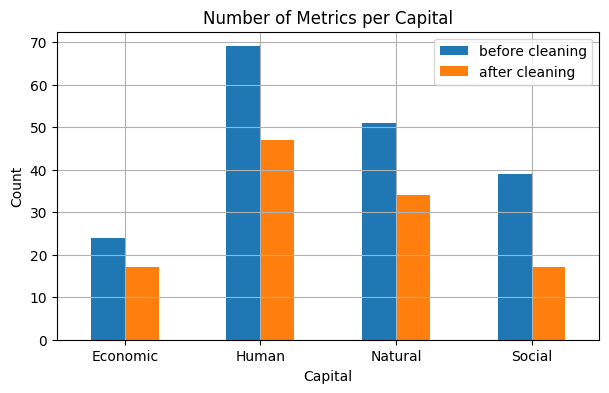

In [6]:
n_metrics_per_capital = analysis.nMetricsPerCapital(results["clean"])
npc = n_metrics_per_capital.analyze()

#### 4.1.2) Analysis of sparse data

Question: How many metrics per capital are too sparse (i.e. have less than 10 data points)

In [ ]:
n_sparse_per_capital = analysis.nSparseMetricsPerCapital(results["sparse_cols"])
nspc = n_sparse_per_capital.analyze()

File ../results/data_availability_analysis/sparse_metrics.csv already exists... not overwriting!
Figure ../results/data_availability_analysis/n_sparse_metrics_by_capital.png already exists... not overwriting!


#### 4.1.3) Analysis of irrelevant data

Question: How many metrics per capital are irrelevant to agenda2030?

In [ ]:
n_irrev_per_capital = analysis.nIrrelevantMetricsPerCapital(results["irrelevant_metrics"])
nipc = n_irrev_per_capital.analyze()

### 4.3) Analysis of raw data availability

Goal: Visually represent how many data points are available for each metric. Add additional information such as when that data is available and what capital the metric belongs to. 

In [ ]:
raw_data_availability = analysis.RawDataAvailability(results["raw"])
rda = raw_data_availability.analyze()

### 4.4) Correlation Analysis

Question: Which metrics are redundant?

In [ ]:
corr_zero_lag = analysis.CorrleationAnalysis(final_output, lag=0)
corr_0 = corr_zero_lag.analyze()

In [ ]:
corr_agg = analysis.CorrleationAnalysis(final_output, lag=-1)
corr_all = corr_agg.analyze()

### 4.5) Trend & Performance Analysis

#### 4.5.1) Analysis of trend statistics per capital
Question: How well do the individual capitals do in terms of evolving in the right direction?

In [ ]:
ta = analysis.PerformanceRanker(results["raw"])

In [ ]:
ta.analyze()

#### 4.5.2) Best & Worst Performering Metrics
##### 4.5.2.a) Best & Worst Performering Metrics over all
Question: Which are the 3 best and worst performing metrics over all capitals?

In [ ]:
ta.additional_results["top_performers"]["overall"]

In [ ]:
ta.additional_results["bottom_performers"]["overall"]

##### 4.5.2.a) Best & Worst Performering Metrics per capital
Question: Which are the 3 best and worst performing metrics within each capital?

In [ ]:
aux.pretty_print({cap: ta.additional_results["top_performers"][cap] for cap in ta.capitallist})

In [ ]:
aux.pretty_print({cap: ta.additional_results["bottom_performers"][cap] for cap in ta.capitallist})

#### 4.5.3) Best & Worst Performing Key Indicators 
Question: What is the ranking of only the key indicators with respect to their evolution over time?

In [ ]:
ta_key = analysis.PerformanceRanker(results["raw"], key_indicators_only=True)
ta_key.analyze()

Question: How many key indicators are there among the groups of best and worst performing metrics, respectively?